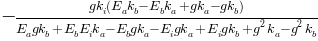

In [1]:
from sympy import *
from sympy.interactive import printing
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

printing.init_printing(use_latex=True)

g,x,c,E_i,k_i,E_a,k_a,E_b,k_b = symbols('g,x c E_i k_i E_a k_a E_b k_b')

growth_rate = Eq(g,(c*E_b/(c+k_b)))

fixed_resources = Eq(E_b+E_a+E_i,1)

steady_state = Eq(c*E_a/(c+k_a)+x*E_i/(x+k_i)-c*E_b/(c+k_b))

x = solve([growth_rate,steady_state],[x,c])[0][0] # we only need x, but with substitution for c
x

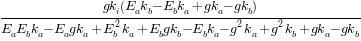

In [2]:
x = simplify(x.subs(E_i,1-E_a-E_b))
x

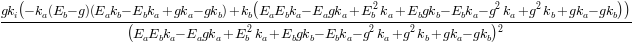

In [27]:
simplify(diff(x,E_a))

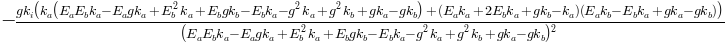

In [28]:
simplify(diff(x,E_b))


In [77]:
#First calculate the minimum required investment in E_b, given the maximal allowed value of c
c_max = 10.0 #maximal allowed concentration of c
g_val = 0.2
k_a_val = 5.0
k_b_val = 2
k_i_val = 1.0

E_b_min = solve(growth_rate.subs([(c,c_max),(g,g_val),(k_b,k_b_val),(k_a,k_a_val)]),E_b)[0]
print("E_b min: %f" % E_b_min)
xp = x.subs([(g,g_val),(k_b,k_b_val),(k_i,k_i_val),(k_a,k_a_val)])
f = lambdify([E_a,E_b],xp,'numpy')
step = 0.01
Ebs = np.arange(E_b_min,1+step/2,step)

Eas = np.arange(0,1+step,step)
szx = len(Eas)
szy = len(Ebs)
xs = np.zeros((szx,szy))
ys = np.zeros((szx,szy))
zs = np.zeros((szx,szy))

for (ix,Ea) in enumerate(Eas):
    for (iy,Eb) in enumerate(Ebs):
        X = f(Ea,Eb)
        xs[ix,iy] = Ea
        ys[ix,iy] = Eb
        if(Ea>1-Eb):
            zs[ix,iy] = 1
        else:
            if(X == zoo):
                zs[ix,iy] = 0
            else:
                zs[ix,iy] = max(X,0)
            
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
ax.plot_wireframe(xs,ys,zs,rstride = int(0.05/step),cstride=int(0.05/step))
ax.set_zlim3d(top=5)

TypeError: cannot determine truth value of
0.12/(0.6*E_i - 0.12) < 0

E_b min: 0.240000


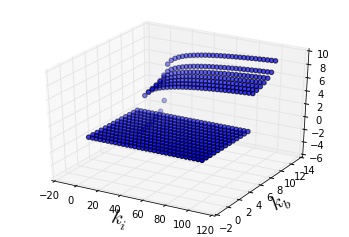

In [3]:
c_max = 10.0 #maximal allowed concentration of c
g_val = 0.3
k_a_val = 5.0
kis = np.linspace(0.01,100,30)
kbs = np.linspace(0.01,20,30)
res = []

for k_b_val in kbs:
    # calculate the minimal investment needed in E_b:
    E_b_min = g_val*(c_max+k_b_val)/c_max
    if E_b_min >=1:
        continue
    # check if under this investment autotrophic growth is possible:
    if (c_max*(1-E_b_min)/(c_max+k_a_val) >= g_val) and (E_b_min:
        for k_i_val in kis:
            res.append((k_i_val,k_b_val,0))
        continue
    for k_i_val in kis:
        E_i_max = 1-E_b_min
        if E_i_max > g_val:
            X = g_val*k_i_val/(E_i_max-g_val)
            res.append((k_i_val,k_b_val,log(X)))

        # find the minimal 
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
xs,ys,zs = zip(*res)
ax.scatter(xs,ys,zs)
#ax.set_zscale('log')
#ax.set_xscale('log')

#ax.set_zlim(top=1000)
ax.set_xlabel('$k_i$',size=20)
ax.set_ylabel('$k_b$',size=20)

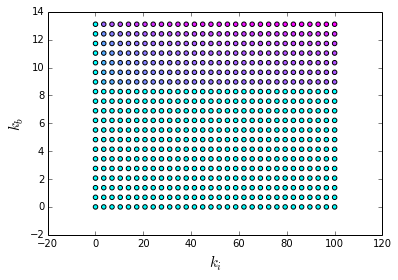

In [4]:
cols = plt.get_cmap('cool')
maxz = max(zip(*res)[2])
xs,ys,zs = zip(*res)
zs = np.array(zs)
zs = zs/maxz

cs = [cols(float(x)) for x in zs]
plt.scatter(xs,ys,c=cs)
plt.xlabel('$k_i$',size=15)
plt.ylabel('$k_b$',size=15)